In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import mglearn

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

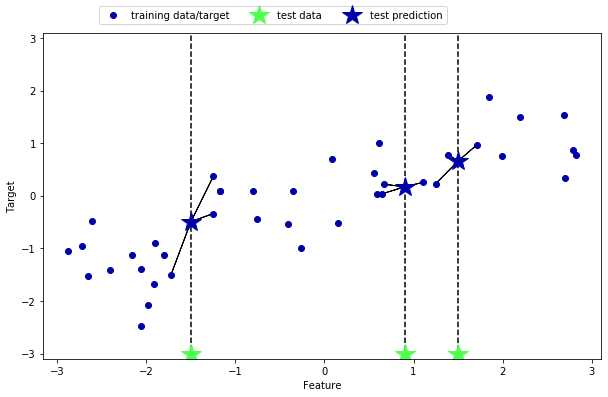

In [4]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [7]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [13]:
X.shape, y.shape

((40, 1), (40,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
reg = KNeighborsRegressor(n_neighbors=3)

In [19]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [21]:
print("test prediction:\n", reg.predict(X_test))

test prediction:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [56]:
# 1에 가까운 수일 수록 정확도가 높음
reg.score(X_test, y_test)

0.6541236379533191

In [57]:
reg.score(X_train, y_train)

0.7283986168755594

In [61]:
x,y,z= zip([1,3,9], [1,3,9])

In [62]:
type(x), x

(tuple, (1, 1))

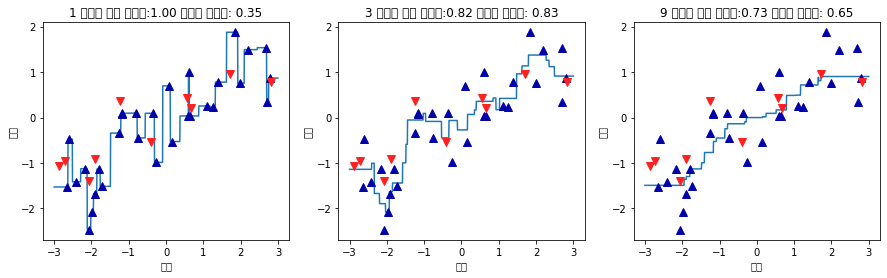

In [65]:
fig, axes = plt.subplots(1,3,figsize=(15,4))
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어:{:.2f} 테스트 스코어: {:.2f}".format(
         n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")

